In [26]:
%run imports.py

Succesfully imported libraries and modules



In [19]:
def copy_patient(patient: Patient):
    new_patient = Patient(patient.name, patient.root_dir)
    for attr in patient.__dict__.keys():
        new_patient.__dict__[attr] = patient.__dict__[attr]
    return new_patient

## N:M Phase Synchronization

### Loading example patient (3)

In [20]:
with open("path_data.txt") as f:
    data_dir = f.readline()

p3_dir = os.path.join(data_dir, "Patient3")
print("Patient directory: ", p3_dir)
p3_pickle_filepath = os.path.join(p3_dir, "Patient3.pkl")

p3 = load_patient_from_pickle(p3_pickle_filepath)

p3.root_dir = p3_dir

p3 = copy_patient(p3)

p3.load_all_pacs(verbose=False)

Patient directory:  D:\LAB\AlexPAC\data\Patient3
List of things to make sure before analysis: 
1) .bdf files are in patient folder (root_dir)
2) annotation files share the same name as .bdf files but with _annotations.txt suffix
3) annotations share the same naming principle: e.g. 1Day OFF RH (Com)


In [115]:
condition = "5Day ON Rest 180sec"
placement = "L3A-3C"

lfp = p3.lfp[condition][placement]
pac = p3.pac[condition][placement][placement]

#### Spectrum

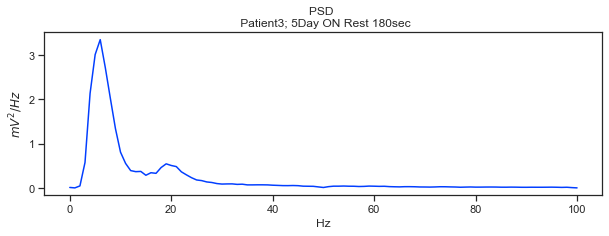

In [23]:
plt.figure(figsize=(10, 3))
lfp.show_psd([0, 100], log=False)

#### FOOOF

In [40]:
from fooof import FOOOF

# spectral range of interest to identify oscillatory peaks
f, psd = lfp.get_psd()
fm = FOOOF(peak_threshold=2)
fm.fit(f, psd, [4, 100])


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



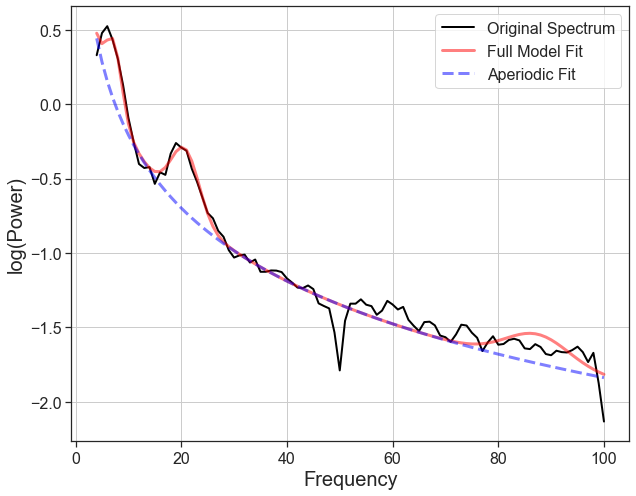

In [41]:
fm.plot()

In [43]:
fm.peak_params_

array([[ 7.29168015,  0.3955212 ,  2.97036609],
       [20.76363334,  0.42442763,  5.3382223 ],
       [87.4435041 ,  0.19633853, 12.        ]])

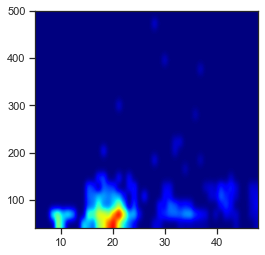

In [25]:
fig = plt.figure(figsize=(4, 4))
comodulogram(pac.pac_matrix, pac.beta_params, pac.hfo_params, pac.pvalues, significant=True)

Based on the PAC comodulogram it is expected to see:
- 20->40 Hz (1:2) phase locking
- 9->...Hz harmonics
- 

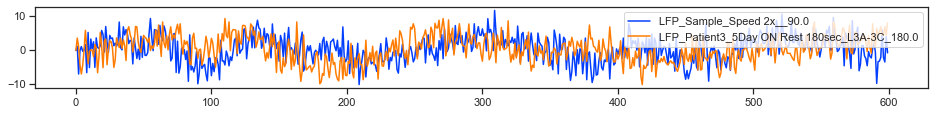

In [12]:
plt.figure(figsize=(16, 1.5))
LFP(lfp.data[::2], condition="Speed 2x").plot(0, 0.3)
lfp.plot(0, 0.3)
plt.legend()

Maybe we will observe non-sinusoidality??

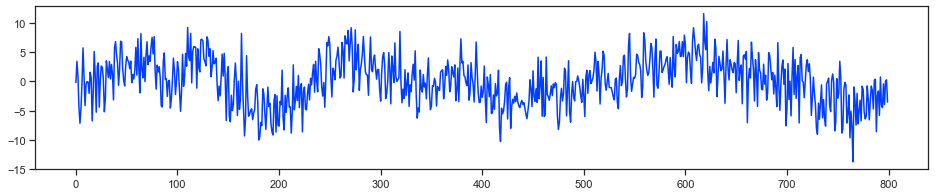

In [13]:
plt.figure(figsize=(16, 3))
lfp.plot(0, 0.4)

1. Считаем фазу Гильбертом (СНАЧАЛА)
2. Потом ускоряем фазу

Text(0.5, 1.0, '10->20 Hz')

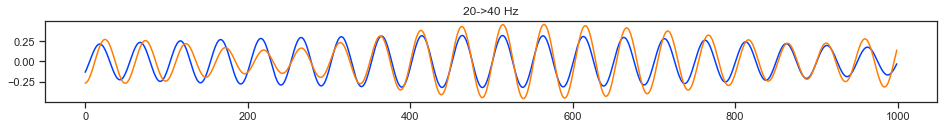

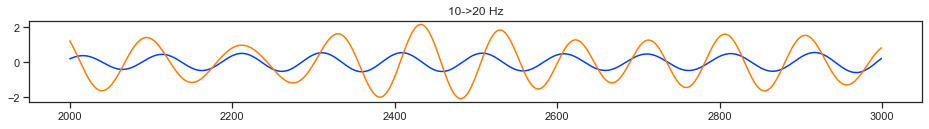

In [14]:
plt.figure(figsize=(16, 1.5))
lfp.bp_filter(39, 41, filter_order=2).plot(0, 0.5)
LFP(lfp.bp_filter(19, 21, filter_order=2).data, condition="Speed 2x").plot(0, 0.5)
plt.title("20->40 Hz")

#plt.legend()

plt.figure(figsize=(16, 1.5))
lfp.bp_filter(19, 21, filter_order=2).normalize().plot(1, 1.5)
LFP(lfp.bp_filter(9, 11, filter_order=2).data[::2], condition="Speed 2x").normalize().plot(1, 1.5)
plt.title("10->20 Hz")

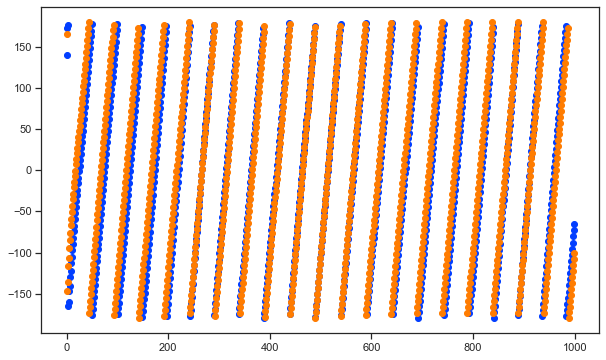

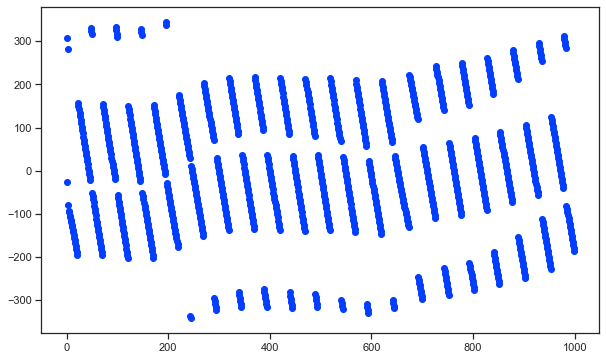

In [57]:
lfp20 = lfp.bp_filter(19, 21, filter_order=2)
lfp40 = lfp.bp_filter(39, 41, filter_order=2)
lfp60 = lfp.bp_filter(59, 61, filter_order=2)

plt.plot(extract_phase(lfp20.data[::2])[0:1000], 'o')
plt.plot(extract_phase(lfp40.data)[0:1000], 'o')
plt.show()

phase_diff = extract_phase(lfp20.data[::2]) - extract_phase(lfp40.data)[::2]
plt.plot(phase_diff[:1000], 'o');

In [56]:
extract_phase(lfp20.data[::2]).shape
extract_phase(lfp40.data).shape

(360000,)

(array([18002., 18019., 17950., 18063., 17998., 17971., 18003., 17955.,
        18017., 18022.]),
 array([3.56719798e-04, 1.80000610e+01, 3.59997652e+01, 5.39994695e+01,
        7.19991737e+01, 8.99988780e+01, 1.07998582e+02, 1.25998286e+02,
        1.43997991e+02, 1.61997695e+02, 1.79997399e+02]),
 <BarContainer object of 10 artists>)

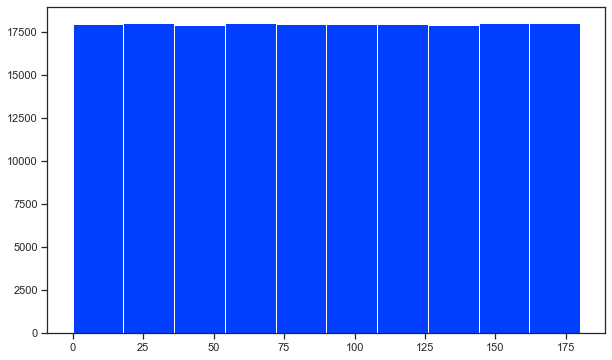

In [52]:
p

In [58]:
distr = np.histogram(phase_diff, bins=np.arange(-180, 200, 20))[0]
distr = distr / distr.sum()
N = len(distr)
S = entropy(distr)
S_max = np.log(N)

print(S)
print(S_max)
print((S_max - S)/S_max)

2.873209420784504
2.8903717578961645
0.005937761142584918


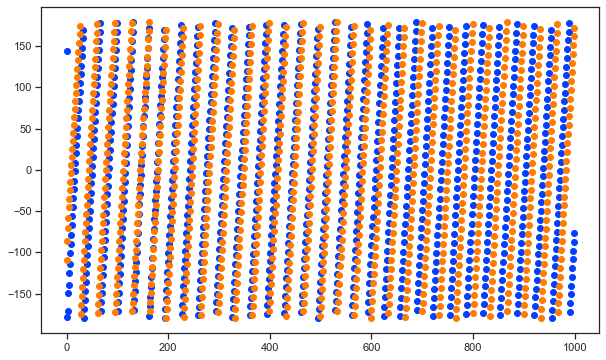

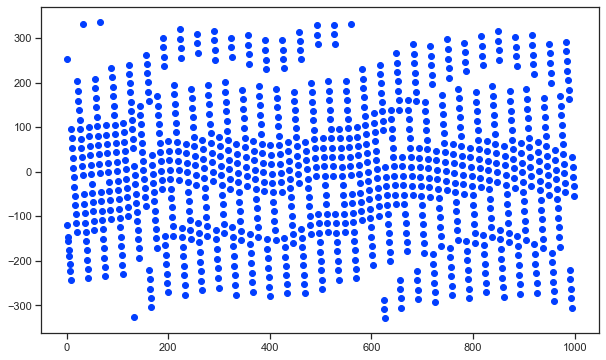

In [61]:
lfp20 = lfp.bp_filter(19, 21, filter_order=2)
lfp40 = lfp.bp_filter(39, 41, filter_order=2)
lfp60 = lfp.bp_filter(59, 61, filter_order=2)

plt.plot(extract_phase(lfp20.data[::3])[0:1000], 'o')
plt.plot(extract_phase(lfp60.data)[0:1000], 'o')
plt.show()

phase_diff = (extract_phase(lfp20.data[::3]) - extract_phase(lfp60.data)[::3])
plt.plot(phase_diff[:1000], 'o')

(array([3505., 3900., 4296., 4718., 5005., 5377., 5678., 6110., 6478.,
        6468., 6140., 5780., 5457., 5001., 4632., 4219., 3849., 3503.]),
 array([-180, -160, -140, -120, -100,  -80,  -60,  -40,  -20,    0,   20,
          40,   60,   80,  100,  120,  140,  160,  180]),
 <BarContainer object of 18 artists>)

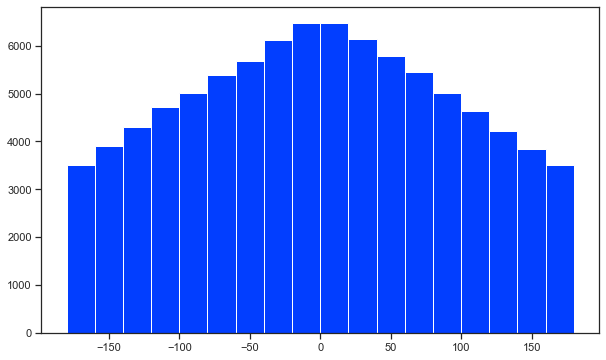

In [64]:
plt.hist(phase_diff, bins=np.arange(-180, 200, 20))

In [65]:
distr = np.histogram(phase_diff, bins=np.arange(-180, 200, 20))[0]
distr = distr / distr.sum()
N = len(distr)
S = entropy(distr)
S_max = np.log(N)

print(S)
print(S_max)
print((S_max - S)/S_max)

2.871699348132847
2.8903717578961645
0.006460210425287556


In [68]:
distr = np.ones(N)/N

S = entropy(distr)
S_max = np.log(N)

print(S)
print(S_max)
print((S_max - S)/S_max)

2.890371757896165
2.8903717578961645
-1.5364432226991625e-16


### Let's investigate another patient (P1)

In [69]:
p1 = load_patient(1)

Patient directory:  D:\LAB\AlexPAC\data\Patient1


In [72]:
condition = "5Day OFF Rest 180sec"
placement = "R2B-3B"

lfp = p1.lfp[condition][placement]
pac = p1.pac[condition][placement][placement]

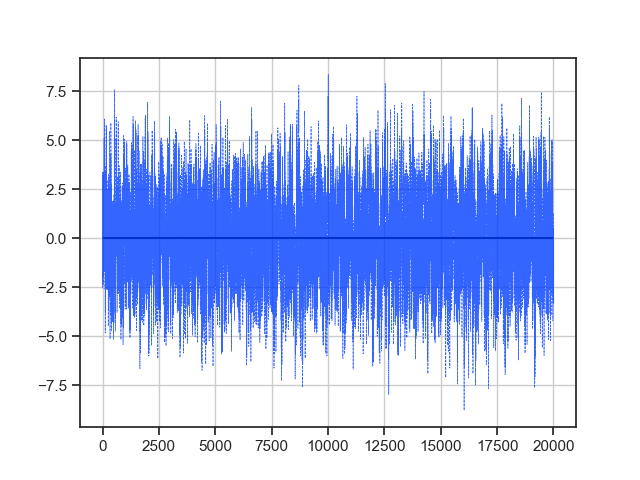

In [101]:
%matplotlib widget

sf = lfp.sf
begin, end = 0, 10
lfp.plot(0, 10, alpha=0.8.linestyle='--', linewidth=0.5)
plt.hlines(0, begin * sf, end * sf, color='black')
plt.grid()

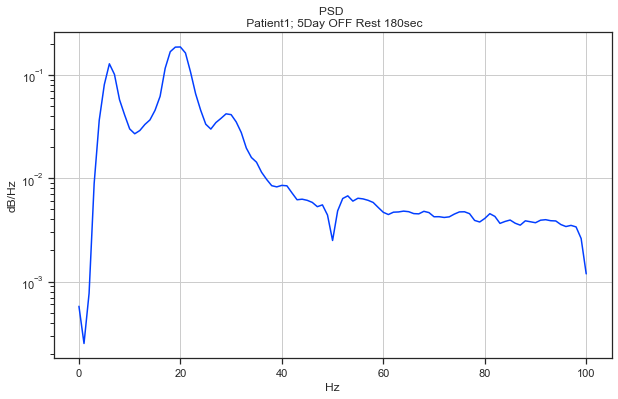

In [76]:
lfp.show_psd([0, 100], log=True)
plt.grid()

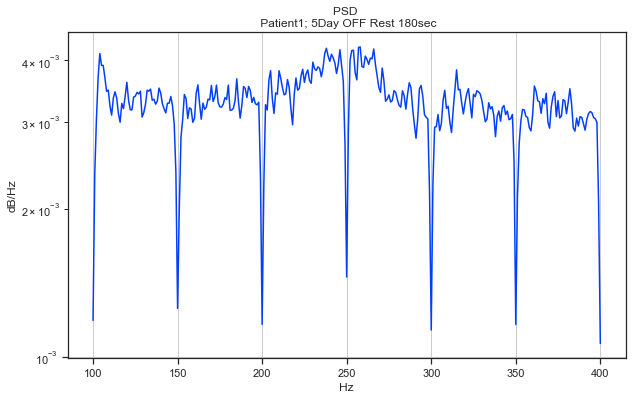

In [83]:
lfp.show_psd([100, 400], log=True)
plt.grid()

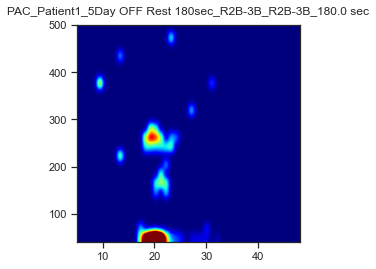

In [82]:
fig = plt.figure(figsize=(4, 4))
comodulogram(pac.pac_matrix, pac.beta_params, pac.hfo_params, pac.pvalues, significant=True, vmax=3e-4)
plt.title(pac.name, pad=10);

Text(0.5, 1.0, '10->20 Hz')

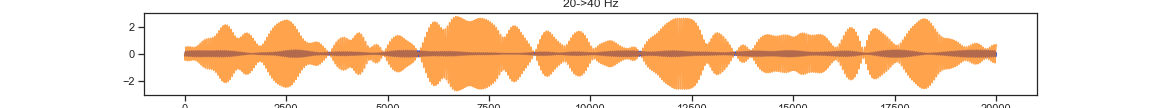

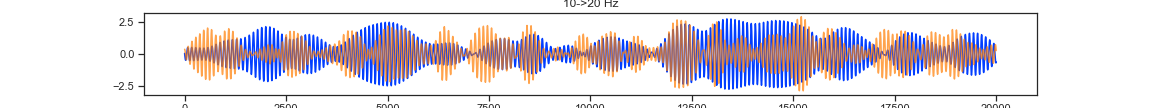

In [114]:
%matplotlib widget

plt.figure(figsize=(16, 1.5))
lfp.bp_filter(39, 41, filter_order=2).plot(0, 10)
LFP(lfp.bp_filter(19, 21, filter_order=2).data[::2], condition="Speed 2x").normalize().plot(0, 10, alpha=0.7)
plt.title("20->40 Hz")

#plt.legend()

plt.figure(figsize=(16, 1.5))
lfp.bp_filter(19, 21, filter_order=2).normalize().plot(0, 10)
LFP(lfp.bp_filter(9, 11, filter_order=2).data[::2], condition="Speed 2x").normalize().plot(0, 10, alpha=0.7)
plt.title("10->20 Hz")

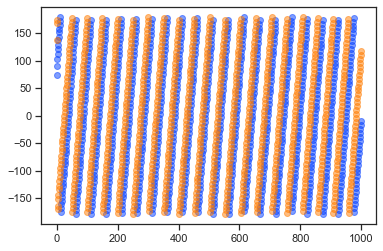

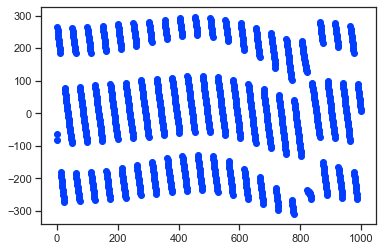

In [112]:
%matplotlib inline

lfp20 = lfp.bp_filter(19, 21, filter_order=2)
lfp40 = lfp.bp_filter(39, 41, filter_order=2)
lfp60 = lfp.bp_filter(59, 61, filter_order=2)

plt.plot(extract_phase(lfp20.data[::2])[0:1000], 'o', alpha=0.5)
plt.plot(extract_phase(lfp40.data)[0:1000], 'o', alpha=0.5)
plt.show()

phase_diff = (extract_phase(lfp20.data[::2]) - extract_phase(lfp40.data)[::2])
plt.plot(phase_diff[:1000], 'o')

## 1:M algorithm

Takes suspect LFP as input

1. Compute PSD
2. Extract 8-40 Hz peaks using FOOOF (use those as base freqs)
3. For each peak:
    - Bandpass m-harmonics around a fooofed frequency (bw ~ 2-3 Hz - narrowband) ZERO PHASE SHIFT FILTER!
    
    - Now we have to decide how much of the signal we want to use, because either way (m-1)/m of m-harmonic signal will be lost due to base signal containing only 1/m of the total time
    - Accelerate base signal by m, use either slicing [::m] or decimate by factor of m
    - Extract phase of accelerated base signal and m-harmonic signal using hilbert-transform
    - Compute $\Psi_{1, m} = (\phi_1(t) - \phi_m(t))mod360$
    - Now choose:
        - Mean vector length: $abs(<exp(i\Psi_{1, m})>$
        - Modulation index: $ KL(P_{\Psi_{1, m}}, U[-180, 180])$

In [ ]:
def nm_phase_coupling(lfp: LFP):
    
    # 1. compute PSD
    # 2. 
    # 3. for each peak:
    #     3.1 bandpass harmonics
    #
    #